In [1]:
import pandas as pd # reading .csv files
import numpy as np  # array/image operations

In [2]:
# load data
train_data = pd.read_csv('dataset/sign_mnist_train.csv')
test_data = pd.read_csv('dataset/sign_mnist_test.csv')

In [3]:
# save labels from training data
train_labels = train_data['label'].values

# drop the 'label' column
train_data.drop('label', axis=1, inplace=True)

In [4]:
images = train_data.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [5]:
# convert labels to categorical values
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)

In [6]:
# split data into 70% training and 30% testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,
                                                    train_labels,
                                                    test_size=0.3,
                                                    random_state=101)

In [7]:
# normalize data
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [9]:
# create the model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),

    Dense(128, activation='relu'),

    Dense(24, activation='softmax')
])

In [10]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=128)

Epoch 1/50
151/151 [==============================] - 1s 3ms/step - loss: 2.9502 - accuracy: 0.1669 - val_loss: 2.1017 - val_accuracy: 0.4224
Epoch 2/50
151/151 [==============================] - 0s 1ms/step - loss: 1.9777 - accuracy: 0.4606 - val_loss: 1.6037 - val_accuracy: 0.5572
Epoch 3/50
151/151 [==============================] - 0s 1ms/step - loss: 1.5586 - accuracy: 0.5726 - val_loss: 1.3627 - val_accuracy: 0.6212

In [12]:
print("Accuracy of the model is: " , model.evaluate(x_test, y_test)[1] * 100 , "%")

258/258 [==============================] - 0s 639us/step - loss: 0.0486 - accuracy: 0.9992
Accuracy of the model is:  99.91501569747925 %


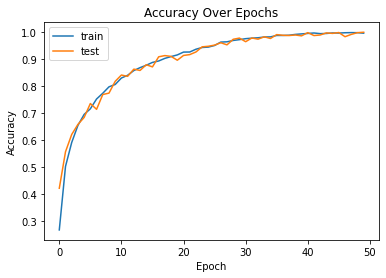

In [13]:
# plot accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

plt.show()

